In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip data.zip

In [0]:
!unzip models.zip

In [0]:
import sys
import os
import torch

from train_unet import train_net
from models.unet import UNet

### Тренировка сети

In [2]:
net = UNet(n_channels=3, n_classes=1)

net.cuda()

try:
    train_net(net=net,
              epochs=20,
              batch_size=4,
              lr=0.01,
              gpu=True,
              img_scale=1,
              apply_aug=0)
except KeyboardInterrupt:
    torch.save(net.state_dict(), 'INTERRUPTED.pth')
    print('Saved interrupt')
    try:
        sys.exit(0)
    except SystemExit:
        os._exit(0)


    Starting training:
        Epochs: 20
        Batch size: 4
        Learning rate: 0.01
        Training size: 2499
        Validation size: 131
        Checkpoints: True
        CUDA: True
    
Starting epoch 1/20.
0.0000 --- loss: 0.711348


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0.1601 --- loss: 0.537688
0.3201 --- loss: 0.500276
0.4802 --- loss: 0.481261
0.6403 --- loss: 0.463150
0.8003 --- loss: 0.446257
0.9604 --- loss: 0.431247
Epoch finished ! Loss: 0.4290520407450505
Validation Dice Coeff: 0.8680469737253116
Checkpoint 1 saved !
Starting epoch 2/20.
0.0000 --- loss: 0.351717
0.1601 --- loss: 0.344790
0.3201 --- loss: 0.344129
0.4802 --- loss: 0.338759
0.6403 --- loss: 0.335947
0.8003 --- loss: 0.327480
0.9604 --- loss: 0.320540
Epoch finished ! Loss: 0.3205834385485221
Validation Dice Coeff: 0.884092170546073
Checkpoint 2 saved !
Starting epoch 3/20.
0.0000 --- loss: 0.305171
0.1601 --- loss: 0.273471
0.3201 --- loss: 0.280970
0.4802 --- loss: 0.278334
0.6403 --- loss: 0.275518
0.8003 --- loss: 0.269539
0.9604 --- loss: 0.264715
Epoch finished ! Loss: 0.265849497097616
Validation Dice Coeff: 0.9021405304661234
Checkpoint 3 saved !
Starting epoch 4/20.
0.0000 --- loss: 0.278453
0.1601 --- loss: 0.236368
0.3201 --- loss: 0.241539
0.4802 --- loss: 0.235321


### Предсказание маски для одного из изображений тестового датасета как наглядный пример работы модели

#### Лучшая модель (horizontal flip в применении к датасету)

Loading model /content/gdrive/My Drive/MIL Internship/checkpoints/CP_augs20_score0.965.pth
Model loaded !


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


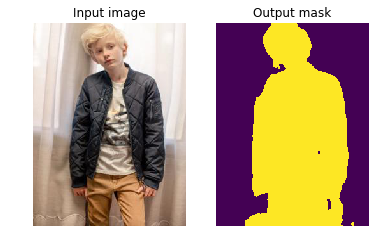

In [2]:
from PIL import Image

from test_predict import *
from utils import plot_img_and_mask

model = '/content/gdrive/My Drive/MIL Internship/checkpoints/CP_augs20_score0.965.pth'
net = UNet(n_channels=3, n_classes=1)

print("Loading model {}".format(model))

net.cuda()
net.load_state_dict(torch.load(model))

print("Model loaded !")

test_dir = '/content/gdrive/My Drive/MIL Internship/data/test'
in_file = os.path.join(test_dir, '1468.jpg')

img = Image.open(in_file)

mask = predict_img(net=net,
                   full_img=img,
                   scale_factor=1,
                   out_threshold=0.5,
                   use_gpu=True)

#print("Visualizing results for image {}, close to continue ...".format(in_file))
plot_img_and_mask(img, mask)

#### Тренировка без аугментаций

Loading model /content/gdrive/My Drive/MIL Internship/checkpoints/best_model_score0.968.pth
Model loaded !


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


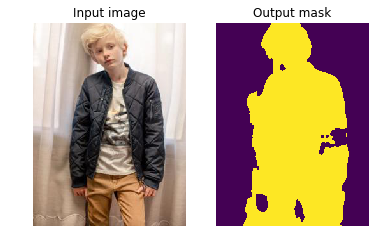

In [3]:
model = '/content/gdrive/My Drive/MIL Internship/checkpoints/best_model_score0.968.pth'
net = UNet(n_channels=3, n_classes=1)

print("Loading model {}".format(model))

net.cuda()
net.load_state_dict(torch.load(model))

print("Model loaded !")

test_dir = '/content/gdrive/My Drive/MIL Internship/data/test'
in_file = os.path.join(test_dir, '1468.jpg')

img = Image.open(in_file)

mask = predict_img(net=net,
                   full_img=img,
                   scale_factor=1,
                   out_threshold=0.5,
                   use_gpu=True)

#print("Visualizing results for image {}, close to continue ...".format(in_file))
plot_img_and_mask(img, mask)

#### Horizontal Flip по batch'ам

Loading model /content/gdrive/My Drive/MIL Internship/checkpoints/best_ep34_score0.949_hflip.pth
Model loaded !


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


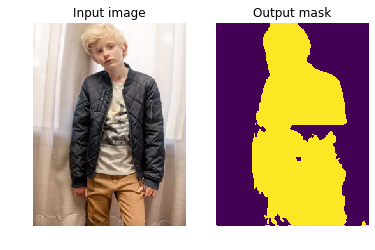

In [4]:
model = '/content/gdrive/My Drive/MIL Internship/checkpoints/best_ep34_score0.949_hflip.pth'
net = UNet(n_channels=3, n_classes=1)

print("Loading model {}".format(model))

net.cuda()
net.load_state_dict(torch.load(model))

print("Model loaded !")

test_dir = '/content/gdrive/My Drive/MIL Internship/data/test'
in_file = os.path.join(test_dir, '1468.jpg')

img = Image.open(in_file)

mask = predict_img(net=net,
                   full_img=img,
                   scale_factor=1,
                   out_threshold=0.5,
                   use_gpu=True)

#print("Visualizing results for image {}, close to continue ...".format(in_file))
plot_img_and_mask(img, mask)

### Значение метрики на "лучшей" модели на валидационном датасете и создание csv-файла результатов

In [8]:
import pandas as pd
from PIL import Image

from test_predict import *
from utils import plot_img_and_mask, normalize, encode_rle, decode_rle
from data_loader import get_ids, split_ids, get_full_img_and_mask
from metrics import dice

model = '/content/gdrive/My Drive/MIL Internship/checkpoints/CP_augs20_score0.965.pth'
net = UNet(n_channels=3, n_classes=1)

print("Loading model {}".format(model))

net.cuda()
net.load_state_dict(torch.load(model))

print("Model loaded !")

val_imgs_dir = '/content/gdrive/My Drive/MIL Internship/data/valid/'
val_masks_dir = '/content/gdrive/My Drive/MIL Internship/data/valid_mask/'
output_dir = '/content/gdrive/My Drive/MIL Internship/results'

val_ids = get_ids(val_imgs_dir)
ids = []
encoded_masks = []
score = 0

for i, id in enumerate(sorted(list(val_ids))):
  #print("\nPredicting image {} ...".format(id))

  img, true_mask = get_full_img_and_mask(id, val_imgs_dir, val_masks_dir)
  true_mask = normalize(true_mask)

  mask = predict_img(net=net,
                     full_img=img,
                     scale_factor=1,
                     out_threshold=0.5,
                     use_gpu=True)
  
  ids.append(id)
  encoded_masks.append(encode_rle(mask)) 
  score += dice(true_mask, mask)

print('\nOverall score on validation data is {:.6f}'.format(score/(i+1)))

#valid_dict = {'id': ids, 'rle_mask': encoded_masks}
#valid_table = pd.DataFrame(valid_dict)
#valid_table.head()
#valid_table.to_csv(os.path.join(output_dir, 'pred_valid.csv'))

Loading model /content/gdrive/My Drive/MIL Internship/checkpoints/CP_augs20_score0.965.pth
Model loaded !


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



Overall score on validation data is 0.952836


### Предсказание масок для тестового датасета и создание html-страницы с результатами

In [4]:
from glob import glob

from utils import get_html

model = '/content/gdrive/My Drive/MIL Internship/checkpoints/CP_augs20_score0.965.pth'
net = UNet(n_channels=3, n_classes=1)

print("Loading model {}".format(model))

net.cuda()
net.load_state_dict(torch.load(model))

print("Model loaded !")

test_imgs_dir = '/content/gdrive/My Drive/MIL Internship/data/test/'
output_dir = '/content/gdrive/My Drive/MIL Internship/results/test'

#test_ids = get_ids(test_imgs_dir)
test_files = sorted(glob(os.path.join(test_imgs_dir, '*.jpg')))
out_masks = []

for file in test_files:

  img = Image.open(file)

  mask = predict_img(net=net,
                     full_img=img,
                     scale_factor=1,
                     out_threshold=0.5,
                     use_gpu=True)
  
  out_masks.append(mask)

_ = get_html(test_files, out_masks, output_dir)
#print('\nHTML page created!')
  

Loading model /content/gdrive/My Drive/MIL Internship/checkpoints/CP_augs20_score0.965.pth
Model loaded !


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
